# DS Job Change Prediction Machine Learning Project

## Problem Statement
- A company which is active in Big Data and Data Science wants to hire data scientists among people who successfully pass some courses which the company conducts. Many people sign up for their training. 

- Company wants to know which of these candidates really wants to work for the company after training or looking for a new employment because it helps to reduce the cost and time as well as the quality of training or planning the courses and categorization of candidates. Information related to demographics, education, experience are in hands from candidates signup and enrollment.


- This dataset is designed to understand the factors that lead a person to leave their current job for HR research too. By model(s) that uses the current credentials,demographics,experience data you will predict the probability of a candidate to look for a new job or will work for the company, as well as interpreting affected factors on employee decision.

---

## Tasks
Hypothesis based EDA:

1. What is the job change percent of users who stayed in their previous company for less than or equal to 2 years?

2. Do people who work in start-ups (employees <= 100) have high job change percent?

3. Are more freshers working in startups with <= 100 employees?

4. Plot the bar charts for all the categorical variables in the data to understand the distributions of the same.

Create new features:

1. One-hot encode all the categorical variables.

2. Standardize the numerical variables

3. Build Models and compare the results:

4. Build a Logistic Regression using statsmodels library

5. Build a Logistic Regression using sklearn library

Compare the performance of the both.

# Import the dependancies

In [1]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score,classification_report
from sklearn.metrics import roc_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from matplotlib import pyplot as plt
from sklearn.preprocessing import OrdinalEncoder
import numpy as np
from sklearn.feature_selection import RFE
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("DS_Job_Change_Data.csv")
df

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,7386,city_173,0.878,Male,No relevent experience,no_enrollment,Graduate,Humanities,14,NaN,NaN,1,42,1.0
19154,31398,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,NaN,NaN,4,52,1.0
19155,24576,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,4,44,0.0
19156,5756,city_65,0.802,Male,Has relevent experience,no_enrollment,High School,NaN,<1,500-999,Pvt Ltd,2,97,0.0


In [3]:
# check for the missing values and dataframes
def inspection(dataframe): 
  import pandas as pd
  import seaborn as sns  
  print("Types of the variables we are working with:")
  print(dataframe.dtypes) # dtypes
  
  print("Total Samples with missing values:")
  
  print(df.isnull().any(axis=1).sum()) # null values
  
  print("Total Missing Values per Variable")
  print(df.isnull().sum())
  print("Map of missing values")
  sns.heatmap(dataframe.isnull())

Types of the variables we are working with:
enrollee_id                 int64
city                       object
city_development_index    float64
gender                     object
relevent_experience        object
enrolled_university        object
education_level            object
major_discipline           object
experience                 object
company_size               object
company_type               object
last_new_job               object
training_hours              int64
target                    float64
dtype: object
Total Samples with missing values:
10203
Total Missing Values per Variable
enrollee_id                  0
city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours     

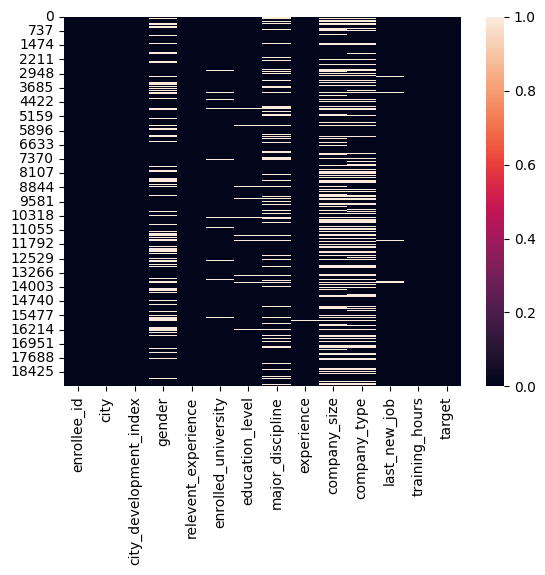

In [4]:
inspection(df)

- According to the information obtained, there are three key variables namely; object, float64 and int64. Moreover, there are quite a few missing datapoint particularly for gender, company size, company type, and major discipline. 

- This information will not be of any use therefor we get rid of these columns

In [5]:
df["last_new_job"].value_counts()

1        8040
>4       3290
2        2900
never    2452
4        1029
3        1024
Name: last_new_job, dtype: int64

In [6]:
df.last_new_job.value_counts(normalize=True)[:10]

1        0.429143
>4       0.175607
2        0.154790
never    0.130878
4        0.054924
3        0.054657
Name: last_new_job, dtype: float64

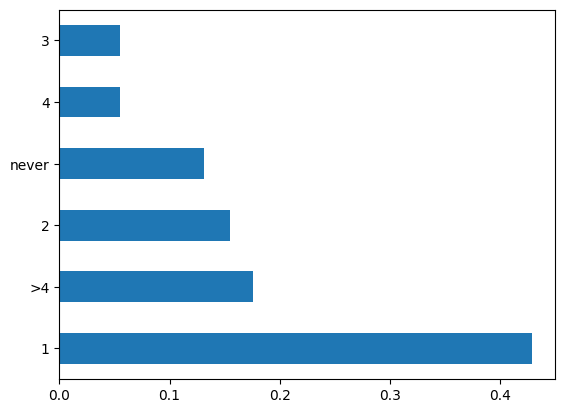

In [8]:
# Let's calculate the percentage of each jon status category
df["last_new_job"].value_counts(normalize=True)
#plot the bar graph of percentage job categories
df.last_new_job.value_counts(normalize=True)[:10].plot.barh()
plt.show()

In [9]:
pd.crosstab(df["last_new_job"],df["company_type"]).reset_index()

company_type,last_new_job,Early Stage Startup,Funded Startup,NGO,Other,Public Sector,Pvt Ltd
0,1,364,602,262,48,357,3974
1,2,90,194,65,19,191,1634
2,3,22,55,26,6,73,633
3,4,27,56,28,4,48,645
4,>4,30,65,108,31,215,2107
5,never,52,19,23,8,52,703


<AxesSubplot:title={'center':'company_type vs last_new_job'}, xlabel='last_new_job'>

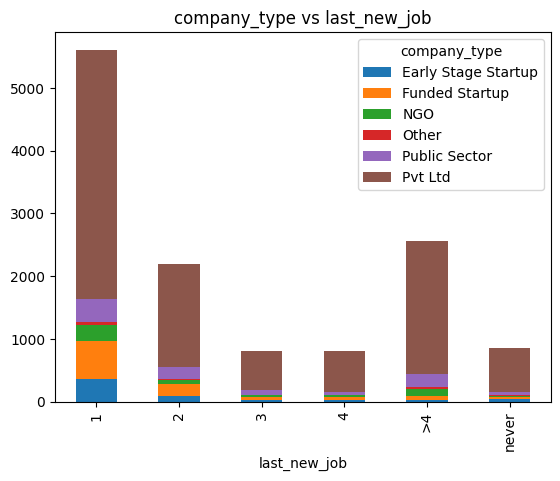

In [10]:
pd.crosstab(df["last_new_job"],df["company_type"]).reset_index().plot(x='last_new_job', kind='bar', stacked=True,
        title='company_type vs last_new_job')

In [5]:
def drop_columns_and_print(df, columns_to_drop):
    """
    Drops specified columns from the DataFrame and prints the remaining DataFrame.
    
    Parameters:
    df (pd.DataFrame): The DataFrame from which to drop columns.
    columns_to_drop (list): List of column names to drop from the DataFrame.
    
    Returns:
    pd.DataFrame: The DataFrame with specified columns dropped.
    """
    # Drop the specified columns
    df_dropped = df.drop(columns=columns_to_drop)
    
    # Print the remaining DataFrame
    print(df_dropped)
    
    return df_dropped



In [13]:
columns_to_drop = ['gender', 'enrolled_university', 'education_level', 'major_discipline','company_size', 'company_type']
df_dropped = drop_columns_and_print(df, columns_to_drop)

       enrollee_id      city  city_development_index      relevent_experience  \
0             8949  city_103                   0.920  Has relevent experience   
1            29725   city_40                   0.776   No relevent experience   
2            11561   city_21                   0.624   No relevent experience   
3            33241  city_115                   0.789   No relevent experience   
4              666  city_162                   0.767  Has relevent experience   
...            ...       ...                     ...                      ...   
19153         7386  city_173                   0.878   No relevent experience   
19154        31398  city_103                   0.920  Has relevent experience   
19155        24576  city_103                   0.920  Has relevent experience   
19156         5756   city_65                   0.802  Has relevent experience   
19157        23834   city_67                   0.855   No relevent experience   

      experience last_new_j

In [6]:
import pandas as pd
import seaborn as sns
print("Total Missing Values per Variable")
print(df_dropped.isnull().sum())
print("Map of missing values")
sns.heatmap(df_dropped.isnull())

Total Missing Values per Variable


NameError: name 'df_dropped' is not defined

In [15]:
df_dropped.last_new_job.unique()

array(['1', '>4', 'never', '4', '3', '2', nan], dtype=object)

In [17]:
df_cleaned = df_dropped.dropna() 

Total Missing Values per Variable
enrollee_id               0
city                      0
city_development_index    0
relevent_experience       0
experience                0
last_new_job              0
training_hours            0
target                    0
dtype: int64
Map of missing values


<AxesSubplot:>

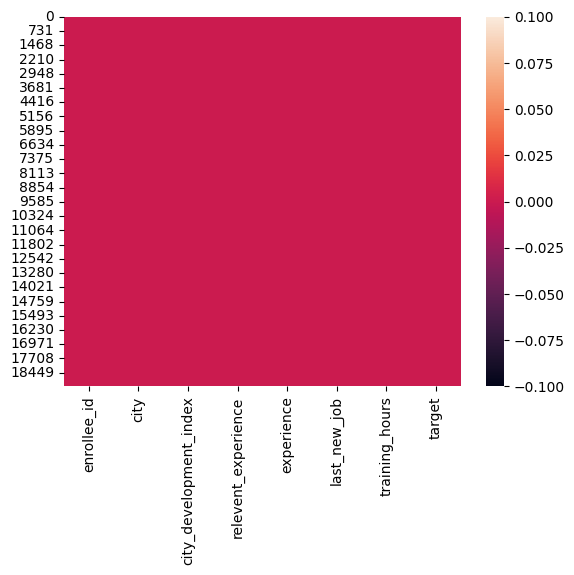

In [18]:
import pandas as pd
import seaborn as sns
print("Total Missing Values per Variable")
print(df_cleaned.isnull().sum())
print("Map of missing values")
sns.heatmap(df_cleaned.isnull())

In [30]:
# Define a function to categorize the values
def categorize_years(years):
    if years in ['1', '2']:
        return '1'
    elif years in ['3', '4']:
        return '0'
    elif years == '>4':
        return '0'
    else:
        return '0'

# Apply the categorization
df_cleaned['years_category'] = df_cleaned['last_new_job'].apply(categorize_years)

# One-hot encode the 'years_category' column
one_hot_encoded = pd.get_dummies(df_cleaned, columns=['years_category'])

# Filter users who stayed less than or equal to 2 years
filtered_df = df_cleaned[df_cleaned['years_category'] == '0-2 years']

# Calculate the job change percentage
job_change_percent = (filtered_df['last_new_job'].sum() / filtered_df.shape[1]) * 100

print(f"Job change percent for users who stayed <= 2 years: {job_change_percent:.2f}%")

# Display the one-hot encoded DataFrame
print(one_hot_encoded)


Job change percent for users who stayed <= 2 years: 0.00%
       enrollee_id      city  city_development_index      relevent_experience  \
0             8949  city_103                   0.920  Has relevent experience   
1            29725   city_40                   0.776   No relevent experience   
2            11561   city_21                   0.624   No relevent experience   
3            33241  city_115                   0.789   No relevent experience   
4              666  city_162                   0.767  Has relevent experience   
...            ...       ...                     ...                      ...   
19153         7386  city_173                   0.878   No relevent experience   
19154        31398  city_103                   0.920  Has relevent experience   
19155        24576  city_103                   0.920  Has relevent experience   
19156         5756   city_65                   0.802  Has relevent experience   
19157        23834   city_67                   0.85

In [31]:
df_cleaned.head(50)

,enrollee_id,city,city_development_index,relevent_experience,experience,last_new_job,training_hours,target,years_category
0,8949,city_103,0.920,Has relevent experience,>20,1,36,1.0,1
1,29725,city_40,0.776,No relevent experience,15,>4,47,0.0,0
2,11561,city_21,0.624,No relevent experience,5,never,83,0.0,0
3,33241,city_115,0.789,No relevent experience,<1,never,52,1.0,0
4,666,city_162,0.767,Has relevent experience,>20,4,8,0.0,0
5,21651,city_176,0.764,Has relevent experience,11,1,24,1.0,1
6,28806,city_160,0.920,Has relevent experience,5,1,24,0.0,1
7,402,city_46,0.762,Has relevent experience,13,>4,18,1.0,0
8,27107,city_103,0.920,Has relevent experience,7,1,46,1.0,1
9,699,city_103,0.920,Has relevent experience,17,>4,123,0.0,0


## Explanation:
**Function Definition**: drop_columns_and_print is defined to take a DataFrame and a list of columns to drop as arguments.

**Documentation String**: Provides a brief description of the function, its parameters, and its return value.

**Dropping Columns**: The drop method is used to drop the specified columns.

**Printing the DataFrame**: The remaining DataFrame is printed.

**Returning the DataFrame**: The function returns the modified DataFrame.

## Example Usage
A sample DataFrame is created.

The columns to drop are specified.

The function drop_columns_and_print is called to drop the specified columns and print the remaining DataFrame.

This function makes it easy to reuse the column-dropping logic in different contexts. Let me know if you need further adjustments or additional features!

Inspect the new information

In [13]:
# check for the missing values and dataframes
def remaining_columns(df_dropped):
  import pandas as pd
  import seaborn as sns
  print("Types of the variables we are working with:")
  print(df_dropped.dtypes) # dtypes
  
  print("Total Samples with missing values:")

  print(df_dropped.isnull().any(axis=1).sum()) # null values

  print("Total Missing Values per Variable")
  print(df_dropped.isnull().sum())
  print("Map of missing values")
  sns.heatmap(df_dropped.isnull())

Types of the variables we are working with:
enrollee_id                 int64
city                       object
city_development_index    float64
relevent_experience        object
enrolled_university        object
education_level            object
experience                 object
last_new_job               object
training_hours              int64
target                    float64
dtype: object
Total Samples with missing values:
1144
Total Missing Values per Variable
enrollee_id                 0
city                        0
city_development_index      0
relevent_experience         0
enrolled_university       386
education_level           460
experience                 65
last_new_job              423
training_hours              0
target                      0
dtype: int64
Map of missing values


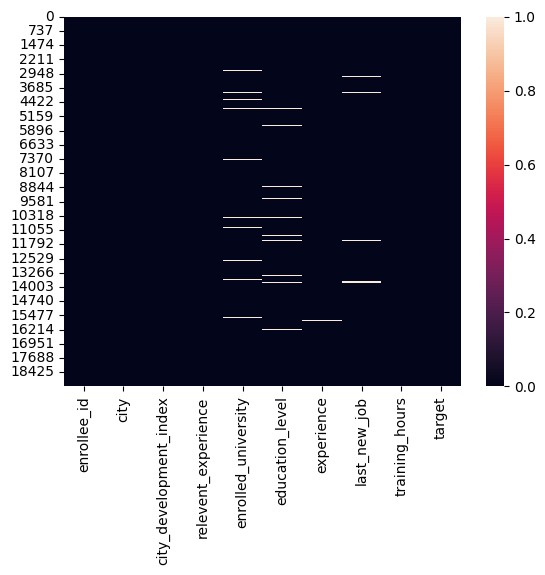

In [16]:
remaining_columns(df_dropped)

## What is the job change percent of users who stayed in their previous company for less than or equal to 2 years?

- So the two key data points required are enrolled_id and last_new_job, so lets remove the missing data then visualise this data  into bar charts

In [32]:
import pandas as pd

def drop_missing_last_new_job(df_dropped):
    """
    Drops rows with missing values in the 'last_new_job' column.
    
    Returns:
    pd.DataFrame: The DataFrame with rows containing missing 'last_new_job' values dropped.
    """
    # Drop rows with missing values in the 'last_new_job' column
    print("removed the missing data in the last_new_job column")
    df_dropped = df_dropped.dropna(subset=['last_new_job'])
    
    print("Map of missing values")
    sns.heatmap(df_dropped)
    
    return df_dropped

In [34]:
drop_missing_last_new_job(df_dropped)

removed the missing data in the last_new_job column
Map of missing values


ValueError: could not convert string to float: 'city_103'

---

# Step 1: Load the Data and Understand Its Structure

# Step 2: Univariate Analysis

# Step 3: Bivariate Analysis

# Step 4: Multivariate Analysis

# Step 5: Handle Missing Values

# Step 6: Feature Engineering

# Step 7: Save the Cleaned Dataset